In [1]:
import pymesh

In [35]:
import numpy as np
import matplotlib.pyplot as plt

## Load + Info

In [4]:
mesh = pymesh.load_mesh('../data/prox_small_model_stl.stl')

In [44]:
print(mesh.num_vertices, mesh.num_faces, mesh.num_voxels)
print(mesh.dim, mesh.vertex_per_face, mesh.vertex_per_voxel)

27760 54639 0
3 3 0


In [ ]:
for i, u in zip(range(3), ['x','y','z']):
    print(u, ' min/max: ', np.min(mesh.vertices[:,i]), )

In [45]:
print(mesh.vertices[:5])
print(mesh.faces[:5])

[[  1.08900412e+06   4.34970850e+06   1.60795386e+03]
 [  1.08900412e+06   4.34970950e+06   1.60834338e+03]
 [  1.08900450e+06   4.34970650e+06   1.60655457e+03]
 [  1.08900462e+06   4.34970600e+06   1.60628674e+03]
 [  1.08900475e+06   4.34970600e+06   1.60620972e+03]]
[[27742 27752 27757]
 [27752 27756 27759]
 [27752 27742 27740]
 [27756 27755 27759]
 [27742 27723 27740]]


## Naive distance_to_mesh profile

In [8]:
mesh.vertices[0:5]

array([[  1.08900412e+06,   4.34970850e+06,   1.60795386e+03],
       [  1.08900412e+06,   4.34970950e+06,   1.60834338e+03],
       [  1.08900450e+06,   4.34970650e+06,   1.60655457e+03],
       [  1.08900462e+06,   4.34970600e+06,   1.60628674e+03],
       [  1.08900475e+06,   4.34970600e+06,   1.60620972e+03]])

In [15]:
np.argmax(np.matmul(mesh.vertices, np.array([1,-1,0])))

27327

In [19]:
v_most_outward = mesh.vertices[27327]
v_most_outward

array([  1.08943688e+06,   4.34979200e+06,   1.51247754e+03])

In [17]:
z_max, z_min = np.max(mesh.vertices[:,2]), np.min(mesh.vertices[:,2])
z_max, z_min

(1614.9586181640625, 1505.0733642578125)

In [20]:
n_pts = 100
zs = np.linspace(z_min, z_max, num=n_pts)

In [29]:
pts_x, pts_y = np.array([[v_most_outward[0]]*n_pts, [v_most_outward[1]]*n_pts])
pts = np.array([pts_x, pts_y, zs]).transpose()

In [33]:
d_sq, face_idxs, v = pymesh.distance_to_mesh(mesh, pts)

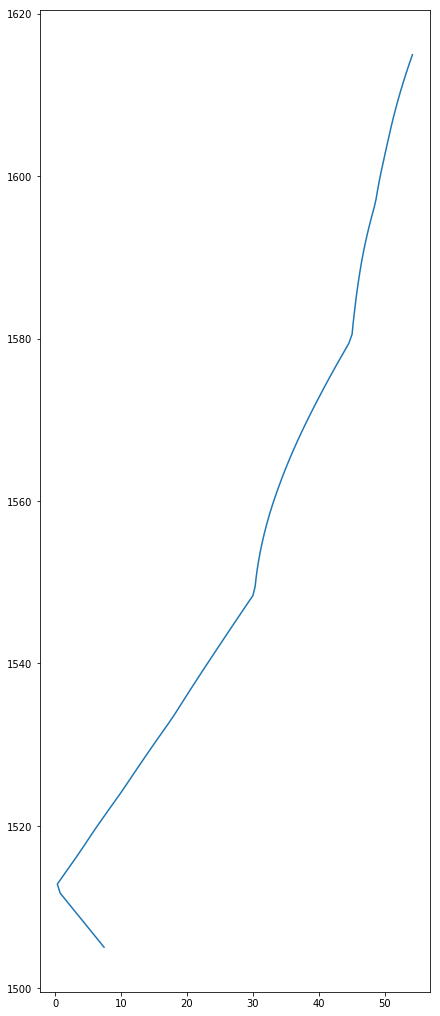

In [43]:
fig, ax = plt.subplots(figsize=(7,7*(129/50)))

ax.plot(np.sqrt(d_sq), zs)

## Find vertical path through adjacent mesh vertices (MOVING ON)

In [46]:
# need to explicitly enable connectivity
mesh.enable_connectivity()

In [51]:
current_vertex = np.argmax(np.matmul(mesh.vertices, np.array([1,-1,0])))
vertex_path = [current_vertex]
neighbors = mesh.get_vertex_adjacent_vertices(current_vertex)

def indices_to_coords(indices):
    return np.array([mesh.vertices[idx] for idx in indices])

np.argmax(indices_to_coords(neighbors)[:,2])

1

In [55]:
# TODO: more elegant stopping solution (based on angle? or angle sequence?)
while mesh.vertices[current_vertex,2] < 1600:
    neighbors = mesh.get_vertex_adjacent_vertices(current_vertex)
    neighbor_coords = indices_to_coords(neighbors)
    
    # take the highest neighbor
    current_vertex = neighbors[np.argmax(neighbor_coords[:,2])]
    print(np.max(neighbor_coords[:,2]))
    vertex_path.append(current_vertex)

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.3

1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.27734375
1593.34655762
1593.2

KeyboardInterrupt: 

In [54]:
len(vertex_path)

17017680

## Use drawn x-y line segments + split to select submeshes

In [56]:
xy_linecoords = np.loadtxt('../data/xy_linecoords.dat')
xy_linecoords

array([[ 1089048.29911929,  4349706.42585086],
       [ 1089149.00546835,  4349708.50388016],
       [ 1089257.21894147,  4349718.78205103],
       [ 1089304.01598182,  4349750.48012047],
       [ 1089344.62903026,  4349786.23217203],
       [ 1089410.4863456 ,  4349843.31976071],
       [ 1089377.97728249,  4349885.44336954]])

In [59]:
xy_linecoords[4] - xy_linecoords[3]

array([ 40.61304844,  35.75205156])

In [109]:
def above_plane(pt, vec, query):
    return np.dot(query-pt, vec) > 0

def below_plane(pt, vec, query):
    return np.dot(query-pt, vec) < 0


def submesh_from_endpts(m, pts):
    '''Points forms lower and upper planes. Filter out vertices that arent b/t them.'''
    vec = pts[1] - pts[0]
    
    is_between = lambda v: (above_plane(pts[0], vec, v) and below_plane(pts[1], vec, v))
    
    good_v_idxs = np.where(np.apply_along_axis(is_between, 1, m.vertices[:,:2]))
    
    safe_face = lambda f: np.setdiff1d(f, good_v_idxs, assume_unique=True).size == 0
    
    good_f_idxs = np.where(np.apply_along_axis(safe_face, 1, m.faces))
    
    submesh = pymesh.form_mesh(m.vertices[good_v_idxs], m.faces[good_f_idxs])
    outward_norm = np.array([vec[1], -vec[0], 0])
    
    return submesh, outward_norm / np.linalg.norm(outward_norm)


In [110]:
test_submesh, norm = submesh_from_endpts(mesh, xy_linecoords[3:5,:])

In [111]:
test_submesh.num_vertices, test_submesh.num_faces

(3117, 5983)

In [112]:


depths = np.sqrt(np.matmul(test_submesh.vertices, -norm))
depths

array([ 1595.36018703,  1595.36063163,  1595.36105034, ...,  1595.33660656,
        1595.33684181,  1595.33654298])

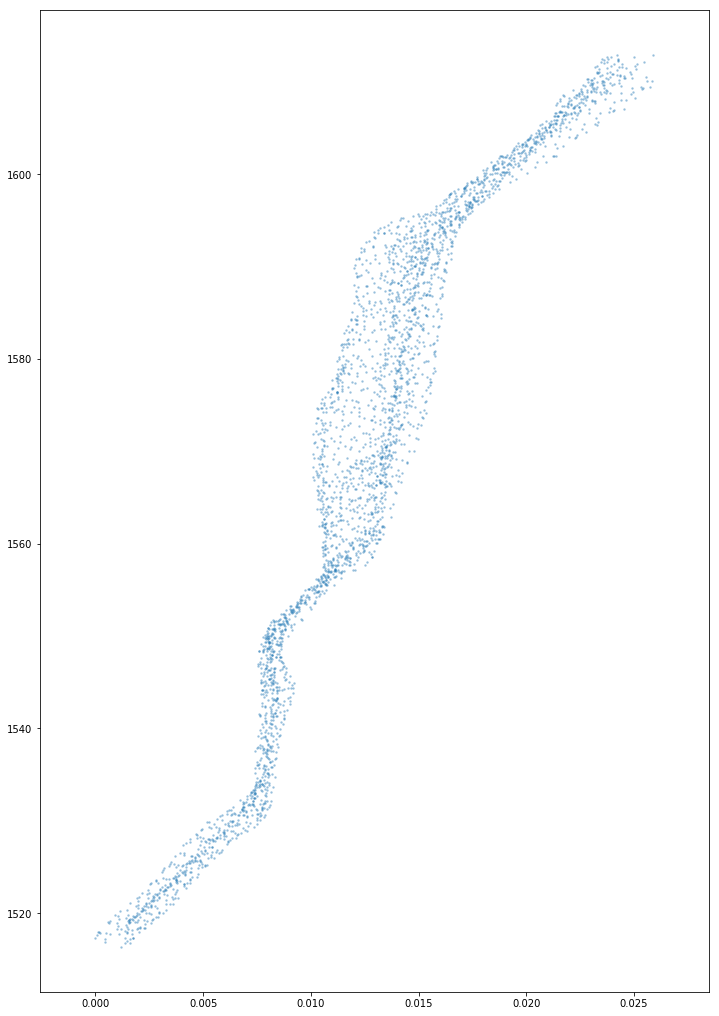

In [155]:
fig, ax = plt.subplots(figsize=(12,7*(129/50)))

ax.scatter(depths - depths.min(), test_submesh.vertices[:,2], s=2.5, alpha=0.3)

# Trying with the point cloud now

In [160]:
import os
os.system("python ../mesh_process.py")

0

In [164]:
point_cloud = np.loadtxt('../data/proximal_small_points_ascii_xyzrgba.pts', skiprows=1)
coords = point_cloud[:,:3]
pt_rgba = point_cloud[:,3:-1] # don't really care about alpha channel
xy_coords = np.loadtxt('../data/proximal_small_points_outcrop_UTMxy_pairs.dat')

In [165]:
coords.shape, pt_rgba.shape, xy_coords.shape

((994173, 3), (994173, 4), (5, 2))

In [175]:
xy_coords

array([[ 1089099.08563568,  4349714.23143637],
       [ 1089209.89536158,  4349711.31660568],
       [ 1089277.78190068,  4349732.33207565],
       [ 1089394.44425424,  4349827.07099844],
       [ 1089378.6495486 ,  4349882.73784703]])

In [178]:
zs, ds, clrs = [], [], []

for i in range(xy_coords.shape[0]-1):
    endpts = xy_coords[i:i+2,:]
    z, d, c = flatslice_pt_cloud(coords, endpts, pt_rgba)
    zs.append(z)
    ds.append(d)
    clrs.append(c)

In [243]:
import colorsys

def to_hsv(clr_arr):
    return np.apply_along_axis(lambda x: colorsys.rgb_to_hsv(*tuple(x)), 1, clr_arr)
    
to_hsv(clrs[-1][:,:3]/255.0)

array([[ 0.        ,  0.        ,  0.21568627],
       [ 0.83333333,  0.05882353,  0.2       ],
       [ 0.80952381,  0.1372549 ,  0.2       ],
       ..., 
       [ 0.76190476,  0.15217391,  0.18039216],
       [ 0.77777778,  0.13043478,  0.18039216],
       [ 0.78571429,  0.17948718,  0.15294118]])

IndexError: index 1 is out of bounds for axis 0 with size 1

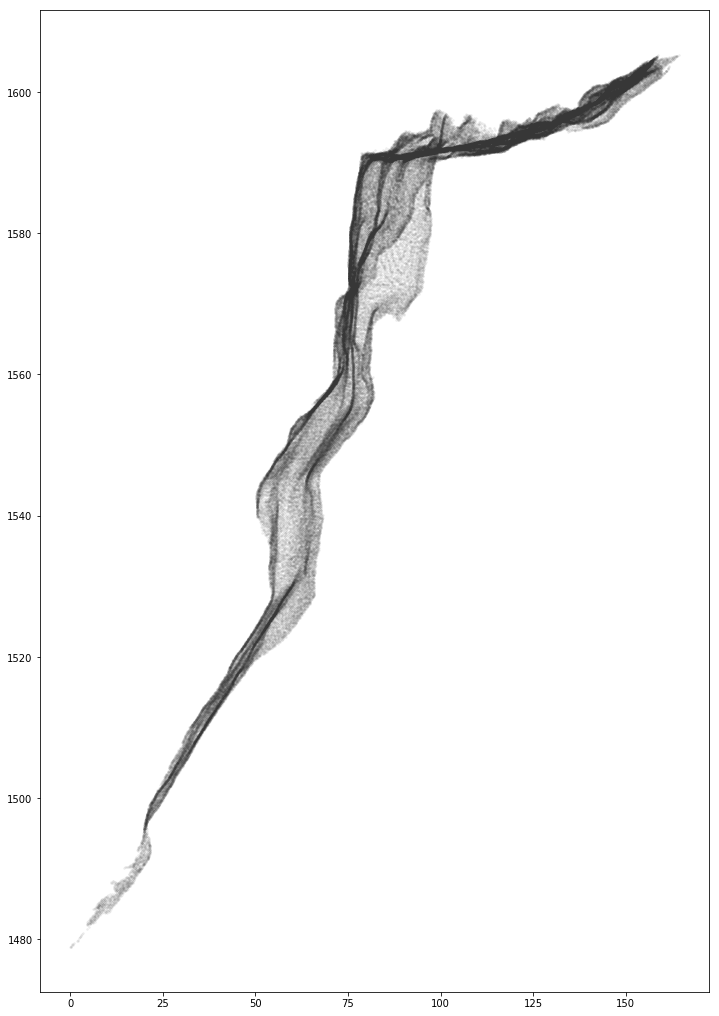

In [250]:
fig, ax = plt.subplots(figsize=(12,7*(129/50)))

def maximize_saturation(rgb, s_factor, v_factor):
    h, s, v = colorsys.rgb_to_hsv(*tuple(rgb/255.0))
    return np.array(colorsys.hsv_to_rgb(h, s*s_factor, v*v*factor))

new_colors = np.apply_along_axis(maximize_saturation, 1, clrs[-1])
    
for i in range(z.size):
    ax.scatter(d[i], z[i], c=clrs[-1][i,:]/255.0, s=3, alpha=0.05)

In [197]:
d.size, z.size, c.shape

(105093, 105093, (105093, 4))

In [208]:
import colorsys
colorsys.hsv_to_rgb(0.4, 1, 1)

(0.0, 1, 0.40000000000000036)

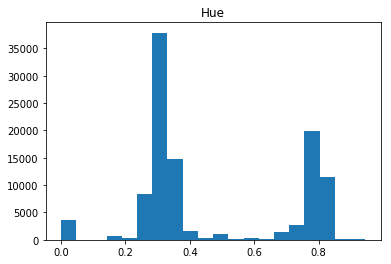

In [246]:
hsvs_example = to_hsv(clrs[-1][:,:3]/255.0)

plt.title("Hue")
plt.hist(hsvs_example[:,0], bins=20)
plt.show()

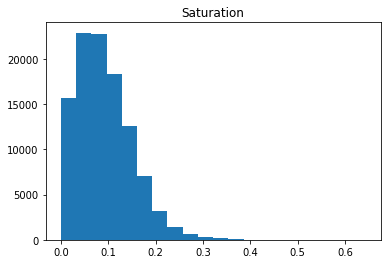

In [247]:
plt.title("Saturation")
plt.hist(hsvs_example[:,1], bins=20)
plt.show()

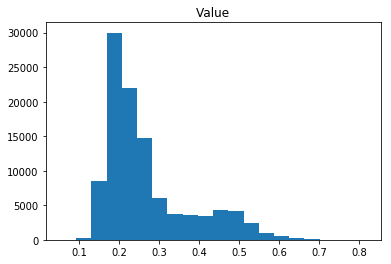

In [248]:
plt.title("Value")
plt.hist(hsvs_example[:,2], bins=20)
plt.show()

In [249]:
hsvs_example[:,1].max(), hsvs_example[:,2].max()

(0.6428571428571429, 0.81568627450980391)

## SVM sand classification 

In [251]:
import pandas as pd

In [252]:
sand_table = pd.read_csv('../data/Sand_hsv_table.csv')
sand_table.plot(x='h_freq', y='y_freq')

h_value      h_freq    s_value      s_freq    v_value      v_freq
0      0.153890   62.098702   0.098432    6.554573  10.580784    3.720382
1      0.248822   57.854399   0.564145   20.113537  11.627470    4.918799
2      0.237938   54.034117   1.163594   21.702479  12.674157    9.639096
3      0.227054   50.213836   1.554413   48.078901  13.760490   16.454585
4      0.216170   46.393555   1.296298   35.248202  14.727882   26.902013
5      0.205286   42.573274   2.206854   50.382866  15.814215   33.362868
6      0.194402   38.752992   2.858943   53.163513  16.813325   39.125055
7      0.183518   34.932711   3.284267   57.008751  17.622128   65.744595
8      0.172634   31.112430   3.556925   74.296430  17.193938   49.993967
9      0.161750   27.292149   4.156180   76.147547  18.668814   62.100428
10     0.150866   23.471867   4.553657   93.522618  19.588629  115.637889
11     0.139982   19.651586   5.089169   93.114033  19.192157   95.191422
12     0.129098   15.831305   5.477016   75.885371  19.192157   83.353993
13     0.436269   10.951195   6.083211   75.776132  19.192157   71.516564
14     0.425385    7.130914   6.518679   90.026947  20.238843  112.947565
15     0.284921    2.906836   7.170180   93.602065  20.238843  101.110136
16     1.825792   10.320377   7.820623   98.607230  20.601158   82.153694
17     1.271464    3.579558   8.472124  102.182347  21.618566  136.818082
18     2.805956   53.832764   9.102765  104.724653  21.840591  121.018539
19     2.934145   48.739660   9.512105  143.335923  21.840591  109.181110
20     2.354875   45.765911   9.253990  130.505223  21.961118   93.900066
21     2.343991   41.945630   9.261100  120.892129  21.237953   85.506253
22     2.333107   38.125349  10.046417  144.550328  22.823841  133.214677
23     2.322223   34.305068  10.453893  156.444687  22.760406   88.000917
24     2.311339   30.484786  11.052955  158.557979  23.616785  166.949719
25     2.300455   26.664505  11.449979  176.544792  23.188596  151.150175
26     2.289571   22.844224  12.049040  178.658084  23.188596  115.637889
27     2.278687   19.023943  12.424733  225.484179  23.188596  103.800461
28     2.267803   15.203661  12.166618  212.653480  23.236172  139.312747
29     3.964617   47.300826  12.173728  203.040386  23.236172  127.475318
..          ...         ...        ...         ...        ...         ...
509  359.587452  115.407135        NaN         NaN        NaN         NaN
510  359.576568  111.586854        NaN         NaN        NaN         NaN
511  359.565684  107.766573        NaN         NaN        NaN         NaN
512  359.554800  103.946292        NaN         NaN        NaN         NaN
513  359.543916  100.126010        NaN         NaN        NaN         NaN
514  359.533032   96.305729        NaN         NaN        NaN         NaN
515  359.522148   92.485448        NaN         NaN        NaN         NaN
516  359.511264   88.665167        NaN         NaN        NaN         NaN
517  359.500380   84.844885        NaN         NaN        NaN         NaN
518  359.489496   81.024604        NaN         NaN        NaN         NaN
519  359.478612   77.204323        NaN         NaN        NaN         NaN
520  359.467728   73.384042        NaN         NaN        NaN         NaN
521  359.456844   69.563760        NaN         NaN        NaN         NaN
522  359.445960   65.743479        NaN         NaN        NaN         NaN
523  359.435076   61.923198        NaN         NaN        NaN         NaN
524  359.424192   58.102916        NaN         NaN        NaN         NaN
525  359.413308   54.282635        NaN         NaN        NaN         NaN
526  359.402424   50.462354        NaN         NaN        NaN         NaN
527  359.391540   46.642073        NaN         NaN        NaN         NaN
528  359.380656   42.821791        NaN         NaN        NaN         NaN
529  359.369772   39.001510        NaN         NaN        NaN         NaN
530  359.358888   35.181229        NaN         NaN        NaN         NaN
531  359.348